### Oracle decoders of Gaussian Process tuning curves

We use the following model to represent the non-linear encoding of stimulus by a population of neurons, with the firing rate of the $i$th neuron in response to stimulus $\theta$ as,

$$
r_i(\theta) = x_i(\theta) + \epsilon_i
$$

where $x_i(\cdot)$ is the non-linear encoding function, and $\epsilon_i$ is the neuron-independent noise. The model further specifies that the neuronal "tuning curves" are drawn from a gaussian process with stationary kernel $K(\Delta\theta)$ and $K(0) = 1$ indepedently for each neuron.

$$
\begin{align*}
E[x_i(\theta)] &= 0\\
E[x_i(\theta_i)x_j(\theta_j)] &= \delta_{ij}K(\theta_i - \theta_j)
\end{align*}
$$

Additionally, the noise $\epsilon_i$ is 0-mean with variance,

$$
\mathbf{E}\left[\epsilon_i \epsilon_j\right] = \delta_{ij}\sigma_n^2.
$$

The single neuron SNR in this setting is simply $\frac{1}{\sigma_n^2}$.

### Fisher Information

We compute the fisher information of two decoders of the stimulus $\theta$, both with perfect knowledges of the tuning curve $\mathbf{x}(\theta)$. there first decoder has access to every neuron's response, $\mathbf{r}$, where as the second decoder has access to only a single linear combination of the population's response, $\mathbf{w}^T\mathbf{r}$.

**Note that when the population has only a single neuron, the performance of the two decoders will be identical.**

We'll express the fisher information for both decoders using the correlation matrix of the population's tuning curve derivatives

#### Correlation matrix of the derivative of tuning curves

The following matrix is important for the fisher information of both decoders:
$$
\mathbf{M}_{ij} = \frac{1}{2\pi}\int_0^{2\pi}d\theta \dot{\mathbf{x}}_i(\theta)\dot{\mathbf{x}}_j(\theta)
$$

#### Decoder 1

The first decoder does ML decoding using the entire vector, $\mathbf{r}$, of the population activity 

$$
\begin{align*}
\left< I_1(\theta) \right>_\theta &= \left< \left[\partial_\theta \log P(\mathbf{r} \mid \theta) \right]^2 \right>_{\mathbf{r},\theta} \\
&= \frac{1}{\sigma_n^2} \sum_i \frac{1}{2\pi} \int_0^{2\pi}d\theta\dot{\mathbf{x}}_i(\theta)^2 \\
& = \frac{1}{\sigma_n^2}\text{Tr}[\mathbf{M}]
\end{align*}
$$

#### Decoder 2

The second decoder does ML decoding using an optimal set of $D \leq N$ linear combination of the population activity, $\mathbf{W}^T\mathbf{r}$, with $\mathbf{W}$ being $N$-by-$D$. Note that for any $\mathbf{W}$,

$$
P(\mathbf{W}^T\mathbf{r} \mid \theta) \sim \mathcal{N}(\mathbf{W}^T\mathbf{x}(\theta), \sigma_n^2\mathbf{W}^T\mathbf{W})
$$

The fisher information is then,

$$
\begin{align*}
\left< I_2(\theta) \right>_\theta &= \max_\mathbf{W}\left< \left[\partial_\theta \log P(\mathbf{W}^T\mathbf{r} \mid \theta) \right]^2 \right>_{\mathbf{r},\theta} \\
&= \max_\mathbf{W} \frac{1}{\sigma_n^2} \frac{1}{2\pi} \int_0^{2\pi} d\theta \dot{\mathbf{x}}(\theta)^T \mathbf{W} \left(\mathbf{W}^T\mathbf{W}\right)^{-1}\mathbf{W}^T\dot{\mathbf{x}}(\theta)
\end{align*}
$$

Write $\mathbf{W} = \mathbf{U}\mathbf{S}\mathbf{V}^T$, in terms of its SVD,

$$
\begin{align*}
\left< I_2(\theta) \right>_\theta &= \max_\mathbf{U} \frac{1}{\sigma_n^2} \frac{1}{2\pi} \int_0^{2\pi} d\theta \text{Tr}\left[\mathbf{U}^T\dot{\mathbf{x}}(\theta) \dot{\mathbf{x}}(\theta)^T \mathbf{U}\right] \\
&= \max_\mathbf{U} \frac{1}{\sigma_n^2} \text{Tr}\left[\mathbf{U}^T \mathbf{M} \mathbf{U}\right]
\end{align*}
$$

The maximum fisher information is then,

$$
\left< I_2(\theta) \right>_\theta = \frac{1}{\sigma_n^2}\sum_{i=1}^D \lambda_i^\mathbf{M}
$$

where $\lambda_i^\mathbf{M}$ is the $i$th largest eigenvalue of $\mathbf{M}$.

#### Summary

Comparing the two decoders,

$$
\frac{I_1(\theta)}{I_2(\theta)} = \frac{\text{Tr}[\mathbf{M}]}{\sum_{i=1}^D \lambda_i^\mathbf{M}}
$$

It's clear that the decoder using linear outputs performs closely to the non-lienar decoder only when the matrix $M$ is low-dimensional with a few large and dominant eigenvalues. It's also clear that, in cases where $D \approx N$, the two decoders have identical performance.

### The $M$ Matrix

We next express the $\mathbf{M}$ matrix in terms of the kernel $K(\theta)$, and its fourier series $\hat{K}_k$, $k\in \mathbb{Z}$. The fourier series for $\mathbf{x}_i(\theta)$ and $\dot{\mathbf{x}}_i(\theta)$ are denoted as $\hat{x}_{i,k}$ and $-ik\hat{x}_{i,k}$.

$$
\begin{align*}
\mathbf{M}_{ij} &= \frac{1}{2\pi}\int_0^{2\pi}d\theta \dot{\mathbf{x}}_i(\theta)\dot{\mathbf{x}}_j(\theta) \\
&= \frac{1}{8\pi^3} \int_0^{2\pi}d\theta \sum_{k_1,k_2} k_1 k_2 \hat{x}_{i,k_1}\hat{x}^*_{j,k_2} e^{i ( k_1 - k_2 )\theta} \\
&= \frac{1}{4\pi^2} \sum_{k=-\infty}^\infty k^2 \hat{x}_{i,k}\hat{x}^*_{j,k}
\end{align*}
$$

Since tuning curves are drawn independently, the random variables $\hat{x}_{i,k}, \hat{x}_{j,k}$ are independent if $i\neq j$. And we have

$$
\begin{align*}
\left< \hat{x}_{i,k} \right> &= \left< \int_0^{2\pi} d\theta x_i(\theta)e^{i k \theta} \right> \\
&= \int_0^{2\pi} d\theta \left<x_i(\theta)\right> e^{i k \theta} \\
&= 0
\end{align*}
$$

and

$$
\begin{align*}
\left< \hat{x}_{i,k}\hat{x}_{i,k}^* \right> &= \left< \int_0^{2\pi} d\theta_1 \int_0^{2\pi} d\theta_2 x_i(\theta_1)x_i(\theta_2)e^{i k (\theta_1 - \theta_2)} \right> \\
&= \int_0^{2\pi} d\theta_1 \int_0^{2\pi} d\theta_2 K(\theta_1 - \theta_2)e^{i k (\theta_1 - \theta_2)} \\
&= 2\pi\hat{K}_k
\end{align*}
$$

This allows us to rewrite the matrix $\mathbf{M}$ as

$$
\begin{align}
\mathbf{M}_{ij} &= \frac{1}{2\pi} \sum_{k=-\infty}^\infty k^2 \hat{K}_k \eta_{i,k}\eta_{j,k}^* \\
&= \frac{1}{2\pi} \sum_{k=0}^\infty k^2 \hat{K}_k \left(\eta_{i,k}\eta_{j,k}^* + \eta_{i,k}^*\eta_{j,k}\right)
\end{align}
$$

with

$$
E[\eta_{i,k}] = 0, E[\eta_{i,k}\eta_{j,k}^*] = \delta_{ij}
$$

#### Decoder 1

Averaging the fisher information of decoder 1 across brains

$$
\begin{align*}
\left< I_1(\theta) \right>_\mathbf{x} &= \frac{1}{\sigma_n^2} \left< \text{Tr}[\mathbf{M}] \right> \\
&= \frac{1}{2\pi\sigma_n^2} \sum_{i=1}^N\sum_{k=0}^\infty k^2 \hat{K}_k \left<\eta_{i,k}\eta_{i,k}^* + \eta_{i,k}^*\eta_{i,k}\right> \\
&= \frac{N}{\pi\sigma_n^2} \sum_{k=0}^\infty k^2 \hat{K}_k \\
&= -\frac{N}{\sigma_n^2} \ddot{K}(0)
\end{align*}
$$

#### Decoder 2

Averaging the fisher information of decoder 2 across brains, and looking at the limiting behaviors with very few, or, a lot of neurons,

$$
\begin{align*}
\left< I_2(\theta) \right>_\mathbf{x} &= \frac{1}{\sigma_n^2}\left< \sum_{i=1}^D \lambda_i^\mathbf{M} \right> \\
&\approx \frac{N}{\sigma_n^2}\left\{
\begin{array}{ll}
\max_{k_1, k_2, \dots, k_D} \sum_i (k_i)^2\hat{K}_{k_i} & N\to\infty, \left<\lambda_i^\mathbf{M}\right> \to \lambda_i^{<\mathbf{M}>} \\
-\ddot{K}(0) & N \to 1, \text{approaches decoder 1}
\end{array}
\right.
\end{align*}
$$

### A specific kernel

Working with the kernel

$$
K(\theta) = \frac{(1 - e^{-1/\Delta})^2}{1 - 2e^{-1/\Delta}\cos\theta + e^{-2/\Delta}}
$$

whose Fourier series is a geometric sequence,

$$
\hat{K}_k = 2\pi\tanh\left(\frac{1}{2\Delta}\right) \exp\left(-\frac{|k|}{\Delta}\right)
$$

#### Decoder 1
Note that normalizations are applied so that $K(0) = 1$. And the first decoder's finsher information is analytical,

$$
\begin{align*}
\left< I_1(\theta) \right>_\mathbf{x} &= \frac{N}{\sigma_n^2}\frac{1}{\cosh\left(\frac{1}{\Delta}\right) - 1} \\
&\approx 2\frac{N}{\sigma_n^2}
\left\{
  \begin{array}{lc}
  \Delta^2 & \Delta \gg 1  \\
  e^{-1/\Delta} & \Delta \ll 1
  \end{array}
\right .
\end{align*}
$$

#### Decoder 2

For the second decoder, when $N$ is small and close to $D$, we have the same results as decoder 1.

When $N$ becomes very large, we look at the specific case with $D = 2$, analogous to the population vector, a complex number, used in the literature. We treat $k$ as an analog variable, to obtain,

$$
k^* = \text{argmax}_k k^2\hat{K}_k + (-k)^2\hat{K}_{-k} = 2\Delta
$$

Note that this analog approximation is only useful when $\Delta \gg 1$, and we used the fact that $\hat{K}_k$ is symmetrical, so that only a single $k^*$ needs to be solved for. When $\Delta < 0.5$, we can only have $k^* = 1$, since setting $k^*=0$ will always yield 0 for $k^2\hat{K}_k$. This is a consequence of the fact that we are coding a circular variable. We then have

$$
\lim_{N\to\infty} \left< I_2(\theta) \right>_\mathbf{x} = 2\frac{N}{\sigma_n^2}\left\{
\begin{array}{ll}
e^{-1/\Delta} & \Delta \ll 1 \\
4e^{-2}\tanh\left(\frac{1}{2\Delta}\right)\Delta^2 & \Delta \gg 1 \\
\end{array}
\right.
$$

**Interestingly, with many many neurons, the second decoder actually has identical scaling w.r.t to SNR, the number of neurons and the tuning curve width. The only difference between the two decoders is a multiplicative penalty that is $1$, i.e. no panelty, for smooth tuning curves, and $4e^{-2} \approx 0.541$ for sharp tuning curves.**

In [2]:
# kernel function
function kernel_fun(Δ)
    κ = exp(-1/Δ)
    return θ -> (1 - κ)^2 ./ (1 - 2κ * cos(θ) + κ^2)
end

# kernel derivative
function kernel_dfun(Δ)
    κ = exp(-1/Δ)
    return θ -> -2κ * sin(θ) ./ (1 - 2κ * cos(θ) + κ^2).^2 * (1 - κ)^2
end

function kernel_ddfun(Δ)
    κ = exp(-1/Δ)
    return θ -> -2κ * ((1 + κ^2) * cos(θ) + κ * (-3 + cos(2θ))) ./ (1 - 2κ * cos(θ) + κ^2).^3 * (1 - κ)^2
end

# kernel fourier series
function kernel_fs(Δ)
    return k -> tanh(1 / 2Δ) * exp(-abs(k) / Δ)
end

function cov_tc(Δ, θs)
    kernel = kernel_fun(Δ)
    ks = kernel(θs)
    return Hermitian(hcat(map(x -> circshift(ks, x), 0:(length(θs)-1))...)')
end

function cov_dtc(Δ, θs)
    ddkernel = kernel_ddfun(Δ)
    ks = -ddkernel(θs)
    return Hermitian(hcat(map(x -> circshift(ks, x), 0:(length(θs)-1))...)')
end

# generate tuning curves
function tc(Δ, res, ntc)
    θs = linrange(0, 2π, res+1)[1:res]
    C = cov_tc(Δ, θs)
    return θs, real(sqrtm(C)) * randn(res, ntc)
end

# generate derivative of tuning curves
# note that cumsum of this does not take into account the DC shift
function dtc(Δ, res, ntc)
    θs = linrange(0, 2π, res+1)[1:res]
    C = cov_dtc(Δ, θs)
    θs, real(sqrtm(C)) * randn(res, ntc)
end

dtc (generic function with 1 method)

In [6]:
# maximum eigenvalue of the matrix M
# using discrete approximation with adaptive resolution
function eigmaxM(N, Δ, D; res=32, resmax=1024, ntrial=20, tgtrtol=1e-3, tgtatol=1e-5, buffer=false)
    rtol, atol, emax = tgtrtol * 10., tgtatol * 10., 1e9
    
    if buffer dtcs=cat(3, [dtc(Δ, resmax, N)[2] for _ in 1:ntrial]...) end
    
    while res <= resmax && rtol >= tgtrtol && atol >= tgtatol
        emaxs = zeros(ntrial)
        for ixtrial in 1:ntrial
            if !buffer
                tmp = dtc(Δ, res, N)[2]
            else
                tmp = squeeze(dtcs[1:(resmax / res):end, :, ixtrial], 3)
            end
            
            M = tmp' * tmp / res
            emaxs[ixtrial] = sum(eigs(M; nev=D)[1])
        end
        atol = abs(mean(emaxs) - emax)
        rtol = abs(mean(emaxs) - emax) / emax
        emax = mean(emaxs)
        res *= 2
    end
    if res >= resmax
        warn("maximal resolution reached!")
    end
    return emax
end

eigmaxM (generic function with 1 method)

In [228]:
using PyPlot
Ns = int(logspace(log10(5), log10(1000), 11))
Δs = [0.2, 1, 5]

data = zeros(length(Δs), length(Ns))

for (kΔ, Δ) in enumerate(Δs)
    println(Δ)
    data[kΔ, :] = map(N -> eigmaxM(N, Δ, 4; buffer=true, resmax=512), Ns)
end

0.2
1.0
5.0


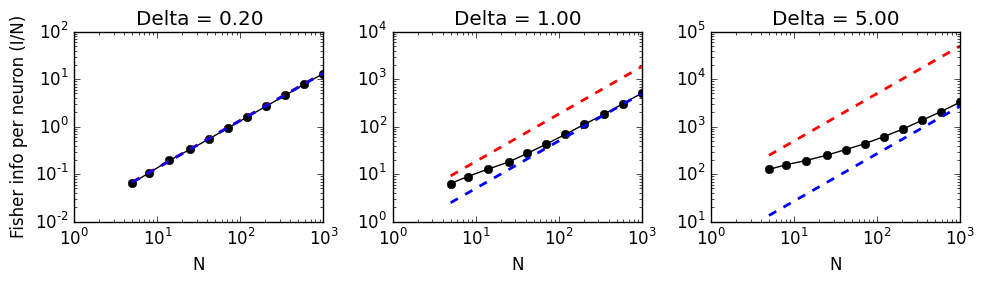

In [101]:
colors = ["r", "g", "b"]

figure(figsize=(10, 3))
subplot(111)
title("red/blue = small/large N limits")

for (kΔ, Δ) in enumerate(Δs)
    subplot(1, length(Δs), kΔ)
    # simulated theory for decoder 2
    plot(Ns, data[kΔ, :]', "ko-")

    # decoder 1, or decoder 2 in small N limit
    plot(Ns, 1 / (cosh(1/Δ) - 1) * Ns, "r--", linewidth=2)
    
    # decoder 2 in large N limits
    if Δ <= 0.5
        plot(Ns, 2 * exp(-1/Δ) * Ns, "b--", linewidth=2)
    else
        plot(Ns, 8 * Δ^2 * exp(-2) * Ns * tanh(1/2Δ), "b--", linewidth=2)
    end
    
    if kΔ == 1 ylabel("Fisher info per neuron (I/N)") end
    xlabel("N"); title(@sprintf("Delta = %0.2f", Δ)) 
    yscale("log"); xscale("log");
end

tight_layout()

In [229]:
σn, res, ntrial = 0.1, 2048, 4

err1 = zeros(length(Ns), length(Δs), res, ntrial)
err2 = zeros(length(Ns), length(Δs), res, ntrial)

for (kN, N) in enumerate(Ns)
    for (kΔ, Δ) in enumerate(Δs)
        for ktrial in 1:ntrial
            # tuning curves
            θs, tcs = tc(Δ, res, N)
            # responses
            r = tcs + randn(res, N) * σn
            # best output weights
            dtcs = diff(tcs, 1)
            dtcs = cat(1, dtcs[1, :] - dtcs[end, :], dtcs)
            w = eigs(dtcs' * dtcs; nev=4)[2]
            # z
            z = tcs * w
            println(size(z))

            # decoder 1
            θ1s = float([θs[findmin(sum((r[k, :] .- tcs).^2, 2))[2]] for k in 1:res])

            # decoder 2
            θ2s = float([θs[findmin(sum((r[k, :] * w .- z).^2, 2))[2]] for k in 1:res])

            err1[kN, kΔ, :, ktrial] = imag(log(exp((θ1s - θs) * im)))
            err2[kN, kΔ, :, ktrial] = imag(log(exp((θ2s - θs) * im)))
        end
    end
end

(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(2048,4)
(

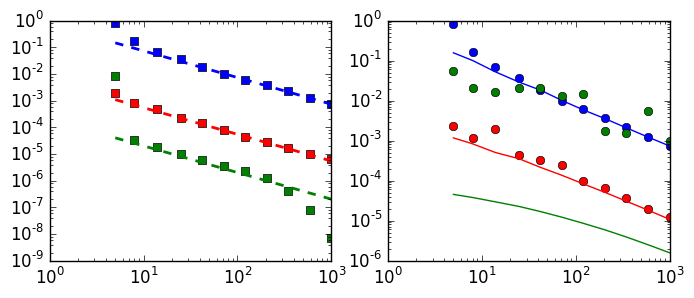

In [230]:
colors = ["b", "r", "g"]

figure(figsize=(8, 3))

for (kΔ, Δ) in enumerate(Δs)
    subplot(121)
    plot(Ns, squeeze(mean(err1.^2, [3, 4]), [3, 4])[:, kΔ], colors[kΔ] * "s")
    # decoder 1, and decoder 2 in small N limit
    plot(Ns, σn^2 * (cosh(1/Δ) - 1) ./ Ns, colors[kΔ] * "--", linewidth=2)
    
    subplot(122)
    plot(Ns, squeeze(mean(err2.^2, [3, 4]), [3, 4])[:, kΔ], colors[kΔ] * "o")
    # decoder 2 in large N limits
    plot(Ns, σn^2 ./ data[kΔ, :]', colors[kΔ])
#     if Δ <= 0.5
#         plot(Ns, σn^2 ./ (2 * exp(-1/Δ) * Ns), colors[kΔ] * "--", linewidth=2)
#     else
#         plot(Ns, σn^2 ./ (8 * Δ^2 * exp(-2) * Ns * tanh(1/2Δ)), colors[kΔ] *"--", linewidth=2)
#     end
end
subplot(121)
yscale("log")
xscale("log")
subplot(122)
yscale("log")
xscale("log")

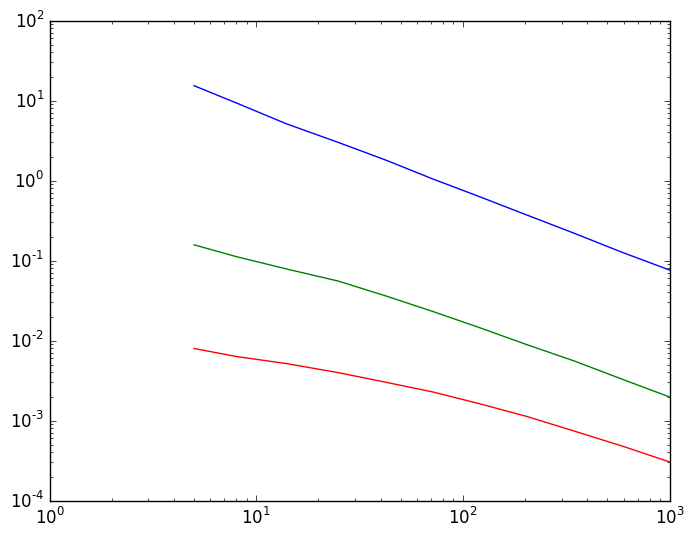

In [104]:
plot(Ns, 1 ./data')
xscale("log")
yscale("log")

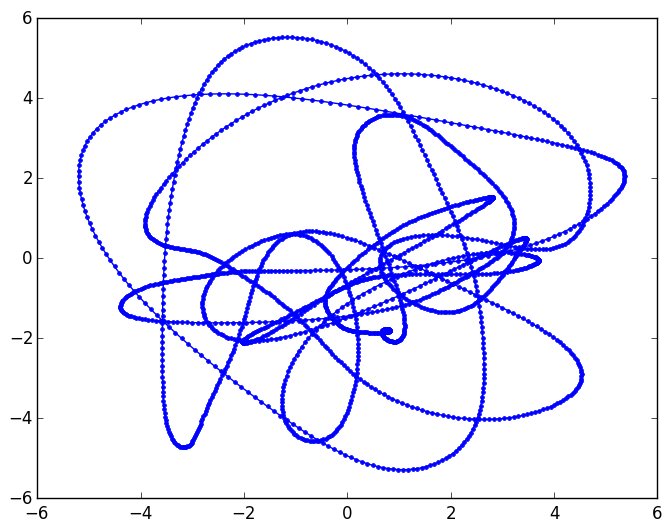

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6f78282e10>

In [108]:
Δ, res, N, σn = 5.0, 2048, 200, 0.1

θs, tcs = tc(Δ, res, N)
# responses
r = tcs + randn(res, N) * σn
# best output weights
dtcs = diff(tcs, 1)
dtcs = cat(1, dtcs[1, :] - dtcs[end, :], dtcs)
w = eigs(dtcs' * dtcs; nev=2)[2]
# z
z = tcs * w

plot(z[:, 1], z[:, 2], ".-")

# decoder 1
# θ1s = float([θs[findmin(sum((r[k, :] .- tcs).^2, 2))[2]] for k in 1:res])

# decoder 2
# θ2s = float([θs[findmin(sum((r[k, :] * w .- z').^2, 2))[2]] for k in 1:res])

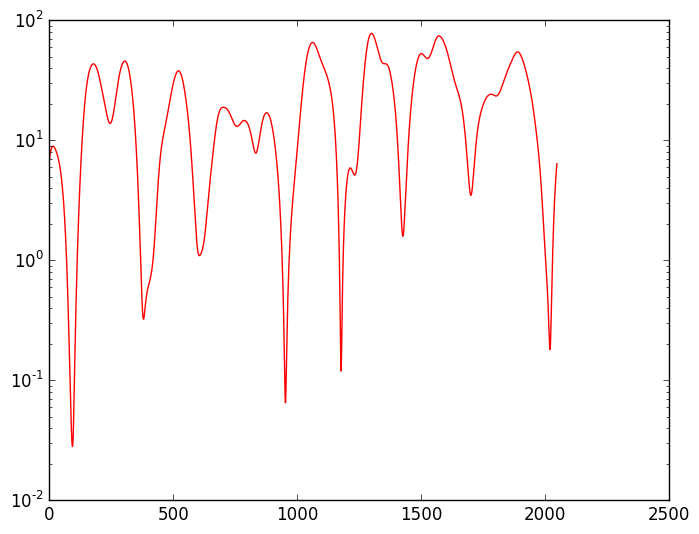

In [109]:
# plot(r * w, "o")
plot(sum((r[100, :] * w .- z).^2, 2), "r")
# plot(sum((r[1000, :] .- tcs).^2, 2), "r")
yscale("log")